In [1]:
!pip install 'zarr<3'

Defaulting to user installation because normal site-packages is not writeable
  Using cached zarr-2.18.7-py3-none-any.whl.metadata (5.8 kB)
  Using cached asciitree-0.3.3-py3-none-any.whl
  Using cached fasteners-0.20-py3-none-any.whl.metadata (4.8 kB)
  Using cached numcodecs-0.15.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.9 kB)
  Using cached deprecated-1.3.1-py2.py3-none-any.whl.metadata (5.9 kB)
Using cached zarr-2.18.7-py3-none-any.whl (211 kB)
Using cached numcodecs-0.15.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.9 MB)
Using cached fasteners-0.20-py3-none-any.whl (18 kB)
Using cached deprecated-1.3.1-py2.py3-none-any.whl (11 kB)

[notice] A new release of pip is available: 23.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [9]:
# ALWAYS RUN THIS FIRST!
import os
import sys
from pathlib import Path

NOTEBOOK_DIR = Path("/rsrch9/home/plm/idso_fa1_pathology/codes/yshokrollahi/vitamin-p")
os.chdir(NOTEBOOK_DIR)
sys.path.insert(0, str(NOTEBOOK_DIR))

print(f"✅ Working directory: {os.getcwd()}")

✅ Working directory: /rsrch9/home/plm/idso_fa1_pathology/codes/yshokrollahi/vitamin-p


## Load Dataset

In [2]:
# Cell 3: Import and create dataloaders
from crc_dataset import Config, create_dataloaders

config = Config("config.yaml")
config.print_config()

train_loader, val_loader, test_loader = create_dataloaders(config)

print("\n✅ Ready to use!")

✅ CRC Dataset Package v1.0.0 loaded
CRC DATASET CONFIGURATION
Config File: config.yaml
Zarr Base: /rsrch9/home/plm/idso_fa1_pathology/TIER2/yasin-vitaminp/ORION-CRC/zarr_data
Cache: ./cache/crc_dataset_cache.pkl
Strategy: memory

📊 Data Splits:
  Train: 28 samples
  Val: 6 samples
  Test: 7 samples

🔄 DataLoader:
  Batch Size: 4
  Num Workers: 0
  Pin Memory: True

🎨 Augmentation:
  Training: False
  Probability: 0.3

🎯 HV Maps:
  Generate: True
  Method: pannuke
  HE Nuclei: True
  HE Cells: True
  MIF Nuclei: True
  MIF Cells: True

🔍 Filtering:
  Min Instances: 0
  Filter Empty: True

CREATING DATALOADERS
Strategy: memory
Use Cache: True
Batch Size: 4
Num Workers: 0

📦 Loading from cache: ./cache/crc_cache_train_82d4f49c.pkl
📦 Loaded 1987 patches from cache
📦 Loading from cache: ./cache/crc_cache_val_79e4cd4c.pkl
📦 Loaded 944 patches from cache
📦 Loading from cache: ./cache/crc_cache_val_81ebba58.pkl
📦 Loaded 406 patches from cache
✅ Dataloaders created:
   Train: 1987 patches (496 

## Model

In [3]:
# In your notebook.ipynb
from models import (
    DualEncoderUNet, HEOnlyUNet, MIFOnlyUNet,
    train_model, train_he_only_model, train_mif_only_model,
    set_seed
)

# Set seed for reproducibility
set_seed(42)

# ========== 1. MULTIMODAL MODEL (HE + MIF) ==========
print("="*60)
print("TRAINING MULTIMODAL MODEL (HE + MIF)")
print("="*60)
model_multimodal = DualEncoderUNet(backbone='resnet101', pretrained=True, dropout_rate=0.3)

total_params = sum(p.numel() for p in model_multimodal.parameters())
trainable_params = sum(p.numel() for p in model_multimodal.parameters() if p.requires_grad)
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# Train multimodal model
model_multimodal = train_model(
    model_multimodal, 
    train_loader, 
    val_loader, 
    num_epochs=50, 
    lr=1e-3, 
    weight_decay=1e-4
)

# # ========== 2. HE-ONLY MODEL ==========
# print("\n" + "="*60)
# print("TRAINING HE-ONLY MODEL")
# print("="*60)
# model_he_only = HEOnlyUNet(backbone='resnet50', pretrained=True, dropout_rate=0.3)

# total_params = sum(p.numel() for p in model_he_only.parameters())
# trainable_params = sum(p.numel() for p in model_he_only.parameters() if p.requires_grad)
# print(f"Total parameters: {total_params:,}")
# print(f"Trainable parameters: {trainable_params:,}")

# # Train HE-only model
# model_he_only = train_he_only_model(
#     model_he_only, 
#     train_loader, 
#     val_loader, 
#     num_epochs=50, 
#     lr=1e-3, 
#     weight_decay=1e-4,
#     checkpoint_dir='checkpoints'
# )

# # ========== 3. MIF-ONLY MODEL ==========
# print("\n" + "="*60)
# print("TRAINING MIF-ONLY MODEL")
# print("="*60)
# model_mif_only = MIFOnlyUNet(backbone='resnet50', pretrained=True, dropout_rate=0.3)

# total_params = sum(p.numel() for p in model_mif_only.parameters())
# trainable_params = sum(p.numel() for p in model_mif_only.parameters() if p.requires_grad)
# print(f"Total parameters: {total_params:,}")
# print(f"Trainable parameters: {trainable_params:,}")

# # Train MIF-only model
# model_mif_only = train_mif_only_model(
#     model_mif_only, 
#     train_loader, 
#     val_loader, 
#     num_epochs=50, 
#     lr=1e-3, 
#     weight_decay=1e-4,
#     checkpoint_dir='checkpoints'
# )

# print("\n" + "="*60)
# print("ALL MODELS TRAINED!")
# print("="*60)
# print("✅ Multimodal model: checkpoints/best_dual_encoder_model.pth")
# print("✅ HE-only model: checkpoints/best_he_only_model.pth")
# print("✅ MIF-only model: checkpoints/best_mif_only_model.pth")

/usr/local/lib/python3.11/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TRAINING MULTIMODAL MODEL (HE + MIF)
Total parameters: 238,139,724
Trainable parameters: 238,139,724


Epoch 1/50 [Val]: 100%|██████████| 236/236 [00:20<00:00, 11.31it/s, loss=0.4837]



Epoch 1: Train Loss: 0.4793 | Val Loss: 0.3734
💾 Best model saved! Val loss: 0.3734


Epoch 2/50 [Val]: 100%|██████████| 236/236 [00:21<00:00, 10.94it/s, loss=0.4365]



Epoch 2: Train Loss: 0.3597 | Val Loss: 0.3077
💾 Best model saved! Val loss: 0.3077


Epoch 3/50 [Val]: 100%|██████████| 236/236 [00:21<00:00, 10.96it/s, loss=0.4674]



Epoch 3: Train Loss: 0.3368 | Val Loss: 0.2941
💾 Best model saved! Val loss: 0.2941


Epoch 4/50 [Val]: 100%|██████████| 236/236 [00:23<00:00,  9.93it/s, loss=0.4541]



Epoch 4: Train Loss: 0.3169 | Val Loss: 0.3010


Epoch 5/50 [Val]: 100%|██████████| 236/236 [00:21<00:00, 10.89it/s, loss=0.4436]



Epoch 5: Train Loss: 0.3062 | Val Loss: 0.2651
💾 Best model saved! Val loss: 0.2651


Epoch 6/50 [Val]: 100%|██████████| 236/236 [00:24<00:00,  9.80it/s, loss=0.4275]



Epoch 6: Train Loss: 0.2969 | Val Loss: 0.2714


Epoch 7/50 [Val]: 100%|██████████| 236/236 [00:23<00:00, 10.23it/s, loss=0.4319]



Epoch 7: Train Loss: 0.2895 | Val Loss: 0.2587
💾 Best model saved! Val loss: 0.2587


Epoch 8/50 [Val]: 100%|██████████| 236/236 [00:20<00:00, 11.48it/s, loss=0.4188]



Epoch 8: Train Loss: 0.2853 | Val Loss: 0.2705


Epoch 9/50 [Val]: 100%|██████████| 236/236 [00:21<00:00, 10.78it/s, loss=0.4567]



Epoch 9: Train Loss: 0.2765 | Val Loss: 0.2604


Epoch 10/50 [Val]: 100%|██████████| 236/236 [00:24<00:00,  9.81it/s, loss=0.4065]



Epoch 10: Train Loss: 0.2706 | Val Loss: 0.2525
💾 Best model saved! Val loss: 0.2525


Epoch 11/50 [Val]: 100%|██████████| 236/236 [00:23<00:00,  9.91it/s, loss=0.4001]



Epoch 11: Train Loss: 0.2635 | Val Loss: 0.2576


Epoch 12/50 [Val]: 100%|██████████| 236/236 [00:21<00:00, 10.88it/s, loss=0.4009]



Epoch 12: Train Loss: 0.2595 | Val Loss: 0.2566


Epoch 13/50 [Val]: 100%|██████████| 236/236 [00:24<00:00,  9.77it/s, loss=0.4237]



Epoch 13: Train Loss: 0.2532 | Val Loss: 0.2541


Epoch 14/50 [Val]: 100%|██████████| 236/236 [00:21<00:00, 10.85it/s, loss=0.4012]



Epoch 14: Train Loss: 0.2468 | Val Loss: 0.2615


Epoch 15/50 [Val]: 100%|██████████| 236/236 [00:23<00:00,  9.90it/s, loss=0.4666]



Epoch 15: Train Loss: 0.2407 | Val Loss: 0.2519
💾 Best model saved! Val loss: 0.2519


Epoch 16/50 [Val]: 100%|██████████| 236/236 [00:22<00:00, 10.39it/s, loss=0.4314]



Epoch 16: Train Loss: 0.2373 | Val Loss: 0.2561


Epoch 17/50 [Val]: 100%|██████████| 236/236 [00:23<00:00,  9.94it/s, loss=0.4727]



Epoch 17: Train Loss: 0.2289 | Val Loss: 0.2511
💾 Best model saved! Val loss: 0.2511


Epoch 18/50 [Val]: 100%|██████████| 236/236 [00:23<00:00,  9.97it/s, loss=0.5261]



Epoch 18: Train Loss: 0.2252 | Val Loss: 0.2631


Epoch 19/50 [Val]: 100%|██████████| 236/236 [00:23<00:00, 10.14it/s, loss=0.4739]



Epoch 19: Train Loss: 0.2208 | Val Loss: 0.2615


Epoch 20/50 [Val]: 100%|██████████| 236/236 [00:24<00:00,  9.81it/s, loss=0.4803]



Epoch 20: Train Loss: 0.2153 | Val Loss: 0.2650


Epoch 21/50 [Val]: 100%|██████████| 236/236 [00:22<00:00, 10.43it/s, loss=0.5038]



Epoch 21: Train Loss: 0.2126 | Val Loss: 0.2524


Epoch 22/50 [Val]: 100%|██████████| 236/236 [00:23<00:00,  9.93it/s, loss=0.5456]



Epoch 22: Train Loss: 0.2073 | Val Loss: 0.2747


Epoch 23/50 [Val]: 100%|██████████| 236/236 [00:23<00:00,  9.86it/s, loss=0.5519]



Epoch 23: Train Loss: 0.2051 | Val Loss: 0.2748
Epoch 00023: reducing learning rate of group 0 to 8.0000e-05.
Epoch 00023: reducing learning rate of group 1 to 8.0000e-05.
Epoch 00023: reducing learning rate of group 2 to 4.0000e-04.
Epoch 00023: reducing learning rate of group 3 to 8.0000e-04.
Epoch 00023: reducing learning rate of group 4 to 8.0000e-04.


Epoch 24/50 [Val]: 100%|██████████| 236/236 [00:21<00:00, 10.75it/s, loss=0.5251]



Epoch 24: Train Loss: 0.1959 | Val Loss: 0.2633


Epoch 25/50 [Val]: 100%|██████████| 236/236 [00:24<00:00,  9.78it/s, loss=0.5149]



Epoch 25: Train Loss: 0.1920 | Val Loss: 0.2896


Epoch 26/50 [Val]: 100%|██████████| 236/236 [00:24<00:00,  9.65it/s, loss=0.5634]



Epoch 26: Train Loss: 0.1892 | Val Loss: 0.2604


Epoch 27/50 [Val]: 100%|██████████| 236/236 [00:23<00:00, 10.00it/s, loss=0.5740]



Epoch 27: Train Loss: 0.1874 | Val Loss: 0.2656


Epoch 28/50 [Val]: 100%|██████████| 236/236 [00:22<00:00, 10.67it/s, loss=0.5788]



Epoch 28: Train Loss: 0.1838 | Val Loss: 0.2622


Epoch 29/50 [Val]: 100%|██████████| 236/236 [00:23<00:00, 10.01it/s, loss=0.5556]



Epoch 29: Train Loss: 0.1809 | Val Loss: 0.2722
Epoch 00029: reducing learning rate of group 0 to 6.4000e-05.
Epoch 00029: reducing learning rate of group 1 to 6.4000e-05.
Epoch 00029: reducing learning rate of group 2 to 3.2000e-04.
Epoch 00029: reducing learning rate of group 3 to 6.4000e-04.
Epoch 00029: reducing learning rate of group 4 to 6.4000e-04.


Epoch 30/50 [Val]: 100%|██████████| 236/236 [00:21<00:00, 10.99it/s, loss=0.5510]



Epoch 30: Train Loss: 0.1733 | Val Loss: 0.2629


Epoch 31/50 [Val]: 100%|██████████| 236/236 [00:23<00:00, 10.01it/s, loss=0.6078]



Epoch 31: Train Loss: 0.1701 | Val Loss: 0.2835


Epoch 32/50 [Val]: 100%|██████████| 236/236 [00:22<00:00, 10.60it/s, loss=0.5689]


Epoch 32: Train Loss: 0.1690 | Val Loss: 0.2982
Early stopping after 32 epochs


## metrics

In [4]:
import torch
from models import DualEncoderUNet
from metrics import (
    dice_coefficient, 
    iou_score, 
    panoptic_quality,
    aggregated_jaccard_index,
    compute_batch_metrics,
    print_metrics
)

# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# ========== LOAD TRAINED MODEL ==========
print("\n📦 Loading trained model...")

# Create model architecture
model = DualEncoderUNet(backbone='resnet101', pretrained=False, dropout_rate=0.3)

# Load checkpoint
checkpoint = torch.load('checkpoints/best_dual_encoder_model.pth', map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model = model.to(device)

print(f"✅ Loaded checkpoint from epoch {checkpoint['epoch']}")
print(f"✅ Best val loss: {checkpoint['val_loss']:.4f}")

# ========== EVALUATE ==========
model.eval()
with torch.no_grad():
    for batch in val_loader:
        he_img = batch['he_image'].to(device)
        mif_img = batch['mif_image'].to(device)
        
        # Forward pass
        outputs = model(he_img, mif_img)
        
        # Compute metrics for this batch
        batch_metrics = compute_batch_metrics(outputs, batch, device)
        
        # Print
        print_metrics(batch_metrics, title="Validation Metrics")
        
        # Only run one batch for testing
        break

# Example: Manual metric computation
pred_mask = outputs['he_nuclei_seg'][0].cpu()
gt_mask = batch['he_nuclei_mask'][0].unsqueeze(0).cpu()

dice = dice_coefficient(pred_mask, gt_mask)
iou = iou_score(pred_mask, gt_mask)

print(f"\nManual computation:")
print(f"Dice: {dice:.4f}, IoU: {iou:.4f}")

Using device: cuda

📦 Loading trained model...
✅ Loaded checkpoint from epoch 16
✅ Best val loss: 0.2511

Validation Metrics

HE NUCLEI:
  dice        : 0.9112
  iou         : 0.8370
  pq          : 0.0000
  aji         : 0.0020

HE CELL:
  dice        : 0.8981
  iou         : 0.8152
  pq          : 0.0000
  aji         : 0.0004

MIF NUCLEI:
  dice        : 0.8761
  iou         : 0.7807
  pq          : 0.0000
  aji         : 0.0004

MIF CELL:
  dice        : 0.8936
  iou         : 0.8078
  pq          : 0.0000
  aji         : 0.0004


Manual computation:
Dice: 0.9219, IoU: 0.8551


## Visulize sample

✅ Saved to prediction_vs_gt.png


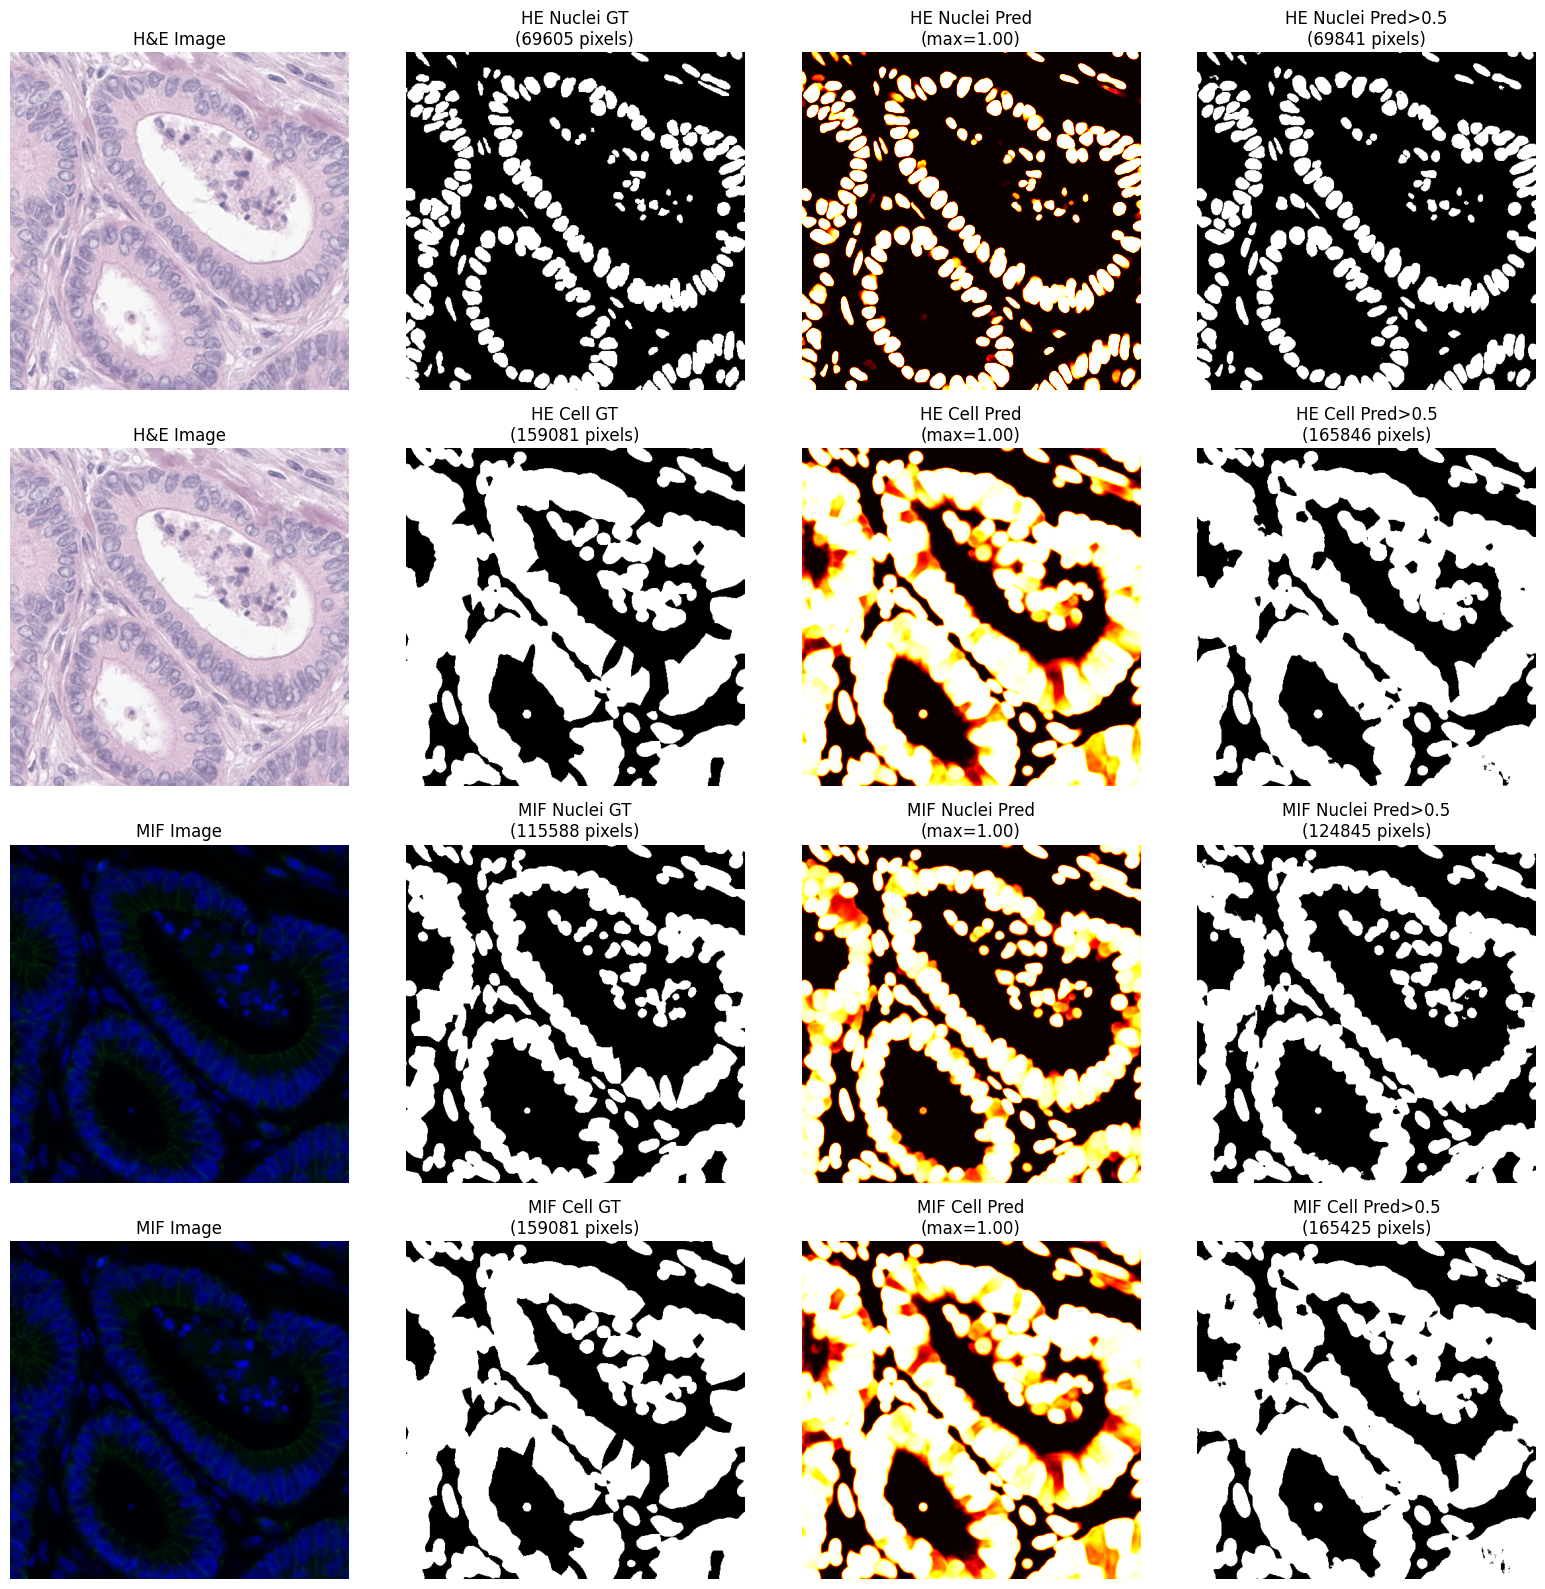


PREDICTION STATISTICS
HE Nuclei  - Pred range: [0.000, 1.000]
HE Cell    - Pred range: [0.000, 1.000]
MIF Nuclei - Pred range: [0.000, 1.000]
MIF Cell   - Pred range: [0.000, 1.000]


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model.eval()

# Get one batch
batch = next(iter(val_loader))
he_img = batch['he_image'].to(device)
mif_img = batch['mif_image'].to(device)

# Get predictions
with torch.no_grad():
    outputs = model(he_img, mif_img)

# Move to CPU and convert to numpy
sample_idx = 0  # First sample in batch

# Predictions (binary masks after sigmoid)
he_nuclei_pred = outputs['he_nuclei_seg'][sample_idx, 0].cpu().numpy()  # (H, W)
he_cell_pred = outputs['he_cell_seg'][sample_idx, 0].cpu().numpy()
mif_nuclei_pred = outputs['mif_nuclei_seg'][sample_idx, 0].cpu().numpy()
mif_cell_pred = outputs['mif_cell_seg'][sample_idx, 0].cpu().numpy()

# Ground truth
he_nuclei_gt = batch['he_nuclei_mask'][sample_idx].cpu().numpy()
he_cell_gt = batch['he_cell_mask'][sample_idx].cpu().numpy()
mif_nuclei_gt = batch['mif_nuclei_mask'][sample_idx].cpu().numpy()
mif_cell_gt = batch['mif_cell_mask'][sample_idx].cpu().numpy()

# Images
he_image = batch['he_image'][sample_idx].cpu().permute(1, 2, 0).numpy()
mif_image = batch['mif_image'][sample_idx].cpu().permute(1, 2, 0).numpy()

# Visualize
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

# Row 1: HE Nuclei
axes[0, 0].imshow(he_image)
axes[0, 0].set_title('H&E Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(he_nuclei_gt, cmap='gray')
axes[0, 1].set_title(f'HE Nuclei GT\n({he_nuclei_gt.sum()} pixels)')
axes[0, 1].axis('off')

axes[0, 2].imshow(he_nuclei_pred, cmap='hot', vmin=0, vmax=1)
axes[0, 2].set_title(f'HE Nuclei Pred\n(max={he_nuclei_pred.max():.2f})')
axes[0, 2].axis('off')

axes[0, 3].imshow((he_nuclei_pred > 0.5).astype(float), cmap='gray')
axes[0, 3].set_title(f'HE Nuclei Pred>0.5\n({(he_nuclei_pred>0.5).sum()} pixels)')
axes[0, 3].axis('off')

# Row 2: HE Cell
axes[1, 0].imshow(he_image)
axes[1, 0].set_title('H&E Image')
axes[1, 0].axis('off')

axes[1, 1].imshow(he_cell_gt, cmap='gray')
axes[1, 1].set_title(f'HE Cell GT\n({he_cell_gt.sum()} pixels)')
axes[1, 1].axis('off')

axes[1, 2].imshow(he_cell_pred, cmap='hot', vmin=0, vmax=1)
axes[1, 2].set_title(f'HE Cell Pred\n(max={he_cell_pred.max():.2f})')
axes[1, 2].axis('off')

axes[1, 3].imshow((he_cell_pred > 0.5).astype(float), cmap='gray')
axes[1, 3].set_title(f'HE Cell Pred>0.5\n({(he_cell_pred>0.5).sum()} pixels)')
axes[1, 3].axis('off')

# Row 3: MIF Nuclei
mif_vis = np.zeros((mif_image.shape[0], mif_image.shape[1], 3))
mif_vis[:, :, 1] = mif_image[:, :, 0]  # Green
mif_vis[:, :, 2] = mif_image[:, :, 1]  # Blue

axes[2, 0].imshow(mif_vis)
axes[2, 0].set_title('MIF Image')
axes[2, 0].axis('off')

axes[2, 1].imshow(mif_nuclei_gt, cmap='gray')
axes[2, 1].set_title(f'MIF Nuclei GT\n({mif_nuclei_gt.sum()} pixels)')
axes[2, 1].axis('off')

axes[2, 2].imshow(mif_nuclei_pred, cmap='hot', vmin=0, vmax=1)
axes[2, 2].set_title(f'MIF Nuclei Pred\n(max={mif_nuclei_pred.max():.2f})')
axes[2, 2].axis('off')

axes[2, 3].imshow((mif_nuclei_pred > 0.5).astype(float), cmap='gray')
axes[2, 3].set_title(f'MIF Nuclei Pred>0.5\n({(mif_nuclei_pred>0.5).sum()} pixels)')
axes[2, 3].axis('off')

# Row 4: MIF Cell
axes[3, 0].imshow(mif_vis)
axes[3, 0].set_title('MIF Image')
axes[3, 0].axis('off')

axes[3, 1].imshow(mif_cell_gt, cmap='gray')
axes[3, 1].set_title(f'MIF Cell GT\n({mif_cell_gt.sum()} pixels)')
axes[3, 1].axis('off')

axes[3, 2].imshow(mif_cell_pred, cmap='hot', vmin=0, vmax=1)
axes[3, 2].set_title(f'MIF Cell Pred\n(max={mif_cell_pred.max():.2f})')
axes[3, 2].axis('off')

axes[3, 3].imshow((mif_cell_pred > 0.5).astype(float), cmap='gray')
axes[3, 3].set_title(f'MIF Cell Pred>0.5\n({(mif_cell_pred>0.5).sum()} pixels)')
axes[3, 3].axis('off')

plt.tight_layout()
# plt.savefig('prediction_vs_gt.png', dpi=150, bbox_inches='tight')
print("✅ Saved to prediction_vs_gt.png")
plt.show()

# Print statistics
print(f"\n{'='*60}")
print("PREDICTION STATISTICS")
print(f"{'='*60}")
print(f"HE Nuclei  - Pred range: [{he_nuclei_pred.min():.3f}, {he_nuclei_pred.max():.3f}]")
print(f"HE Cell    - Pred range: [{he_cell_pred.min():.3f}, {he_cell_pred.max():.3f}]")
print(f"MIF Nuclei - Pred range: [{mif_nuclei_pred.min():.3f}, {mif_nuclei_pred.max():.3f}]")
print(f"MIF Cell   - Pred range: [{mif_cell_pred.min():.3f}, {mif_cell_pred.max():.3f}]")
print(f"{'='*60}")

## Cell boundires

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from postprocessing import process_model_outputs
from postprocessing.utils import (
    visualize_instance_map, 
    compare_before_after_postprocessing,
    get_instance_statistics,
    draw_instance_contours
)

# Setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model.eval()

# Get one batch
batch = next(iter(val_loader))
he_img = batch['he_image'].to(device)
mif_img = batch['mif_image'].to(device)

# Get predictions
with torch.no_grad():
    outputs = model(he_img, mif_img)

# Select sample index
sample_idx = 0

print("="*80)
print("POST-PROCESSING WITH HV MAPS")
print("="*80)

# ============================================================================
# HE NUCLEI POST-PROCESSING
# ============================================================================
print("\n[1/4] Processing HE Nuclei...")
he_nuclei_seg = outputs['he_nuclei_seg'][sample_idx, 0].cpu().numpy()
he_nuclei_h = outputs['he_nuclei_hv'][sample_idx, 0].cpu().numpy()
he_nuclei_v = outputs['he_nuclei_hv'][sample_idx, 1].cpu().numpy()

he_nuclei_inst, he_nuclei_info, num_he_nuclei = process_model_outputs(
    seg_pred=he_nuclei_seg,
    h_map=he_nuclei_h,
    v_map=he_nuclei_v,
    magnification=40
)
print(f"   ✓ Detected {num_he_nuclei} HE nuclei instances")

# ============================================================================
# HE CELL POST-PROCESSING
# ============================================================================
print("\n[2/4] Processing HE Cells...")
he_cell_seg = outputs['he_cell_seg'][sample_idx, 0].cpu().numpy()
he_cell_h = outputs['he_cell_hv'][sample_idx, 0].cpu().numpy()
he_cell_v = outputs['he_cell_hv'][sample_idx, 1].cpu().numpy()

he_cell_inst, he_cell_info, num_he_cells = process_model_outputs(
    seg_pred=he_cell_seg,
    h_map=he_cell_h,
    v_map=he_cell_v,
    magnification=40
)
print(f"   ✓ Detected {num_he_cells} HE cell instances")

# ============================================================================
# MIF NUCLEI POST-PROCESSING
# ============================================================================
print("\n[3/4] Processing MIF Nuclei...")
mif_nuclei_seg = outputs['mif_nuclei_seg'][sample_idx, 0].cpu().numpy()
mif_nuclei_h = outputs['mif_nuclei_hv'][sample_idx, 0].cpu().numpy()
mif_nuclei_v = outputs['mif_nuclei_hv'][sample_idx, 1].cpu().numpy()

mif_nuclei_inst, mif_nuclei_info, num_mif_nuclei = process_model_outputs(
    seg_pred=mif_nuclei_seg,
    h_map=mif_nuclei_h,
    v_map=mif_nuclei_v,
    magnification=40
)
print(f"   ✓ Detected {num_mif_nuclei} MIF nuclei instances")

# ============================================================================
# MIF CELL POST-PROCESSING
# ============================================================================
print("\n[4/4] Processing MIF Cells...")
mif_cell_seg = outputs['mif_cell_seg'][sample_idx, 0].cpu().numpy()
mif_cell_h = outputs['mif_cell_hv'][sample_idx, 0].cpu().numpy()
mif_cell_v = outputs['mif_cell_hv'][sample_idx, 1].cpu().numpy()

mif_cell_inst, mif_cell_info, num_mif_cells = process_model_outputs(
    seg_pred=mif_cell_seg,
    h_map=mif_cell_h,
    v_map=mif_cell_v,
    magnification=40
)
print(f"   ✓ Detected {num_mif_cells} MIF cell instances")

# ============================================================================
# GET IMAGES
# ============================================================================
he_image = batch['he_image'][sample_idx].cpu().permute(1, 2, 0).numpy()
mif_image = batch['mif_image'][sample_idx].cpu().permute(1, 2, 0).numpy()

# Prepare MIF visualization
mif_vis = np.zeros((mif_image.shape[0], mif_image.shape[1], 3))
mif_vis[:, :, 1] = np.clip(mif_image[:, :, 0] * 3, 0, 1)  # Green (3x brighter)
mif_vis[:, :, 2] = np.clip(mif_image[:, :, 1] * 3, 0, 1)  # Blue (3x brighter)

# ============================================================================
# STATISTICS
# ============================================================================
print("\n" + "="*80)
print("INSTANCE STATISTICS")
print("="*80)

he_nuclei_stats = get_instance_statistics(he_nuclei_info)
he_cell_stats = get_instance_statistics(he_cell_info)
mif_nuclei_stats = get_instance_statistics(mif_nuclei_info)
mif_cell_stats = get_instance_statistics(mif_cell_info)

print(f"\nHE Nuclei:")
print(f"  Count: {he_nuclei_stats['count']}")
print(f"  Mean Area: {he_nuclei_stats['mean_area']:.1f} ± {he_nuclei_stats['std_area']:.1f}")
print(f"  Range: [{he_nuclei_stats['min_area']:.0f}, {he_nuclei_stats['max_area']:.0f}]")

print(f"\nHE Cells:")
print(f"  Count: {he_cell_stats['count']}")
print(f"  Mean Area: {he_cell_stats['mean_area']:.1f} ± {he_cell_stats['std_area']:.1f}")
print(f"  Range: [{he_cell_stats['min_area']:.0f}, {he_cell_stats['max_area']:.0f}]")

print(f"\nMIF Nuclei:")
print(f"  Count: {mif_nuclei_stats['count']}")
print(f"  Mean Area: {mif_nuclei_stats['mean_area']:.1f} ± {mif_nuclei_stats['std_area']:.1f}")
print(f"  Range: [{mif_nuclei_stats['min_area']:.0f}, {mif_nuclei_stats['max_area']:.0f}]")

print(f"\nMIF Cells:")
print(f"  Count: {mif_cell_stats['count']}")
print(f"  Mean Area: {mif_cell_stats['mean_area']:.1f} ± {mif_cell_stats['std_area']:.1f}")
print(f"  Range: [{mif_cell_stats['min_area']:.0f}, {mif_cell_stats['max_area']:.0f}]")

print("="*80)

# ============================================================================
# VISUALIZATION 1: Instance Maps with Random Colors
# ============================================================================
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Row 1: HE
axes[0, 0].imshow(he_image)
axes[0, 0].set_title('H&E Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(he_nuclei_seg, cmap='gray')
axes[0, 1].set_title(f'HE Nuclei Binary')
axes[0, 1].axis('off')

# Visualize HE nuclei instances with random colors
he_nuclei_colored = np.zeros((*he_nuclei_inst.shape, 3))
colors = plt.cm.tab20(np.linspace(0, 1, 20))
for idx, inst_id in enumerate(np.unique(he_nuclei_inst)[1:]):
    mask = he_nuclei_inst == inst_id
    he_nuclei_colored[mask] = colors[idx % 20][:3]

axes[0, 2].imshow(he_image)
axes[0, 2].imshow(he_nuclei_colored, alpha=0.6)
axes[0, 2].set_title(f'HE Nuclei Instances ({num_he_nuclei})')
axes[0, 2].axis('off')

# Visualize HE cell instances with random colors
he_cell_colored = np.zeros((*he_cell_inst.shape, 3))
for idx, inst_id in enumerate(np.unique(he_cell_inst)[1:]):
    mask = he_cell_inst == inst_id
    he_cell_colored[mask] = colors[idx % 20][:3]

axes[0, 3].imshow(he_image)
axes[0, 3].imshow(he_cell_colored, alpha=0.6)
axes[0, 3].set_title(f'HE Cell Instances ({num_he_cells})')
axes[0, 3].axis('off')

# Row 2: MIF
axes[1, 0].imshow(mif_vis)
axes[1, 0].set_title('MIF Image')
axes[1, 0].axis('off')

axes[1, 1].imshow(mif_nuclei_seg, cmap='gray')
axes[1, 1].set_title(f'MIF Nuclei Binary')
axes[1, 1].axis('off')

# Visualize MIF nuclei instances with random colors
mif_nuclei_colored = np.zeros((*mif_nuclei_inst.shape, 3))
for idx, inst_id in enumerate(np.unique(mif_nuclei_inst)[1:]):
    mask = mif_nuclei_inst == inst_id
    mif_nuclei_colored[mask] = colors[idx % 20][:3]

axes[1, 2].imshow(mif_vis)
axes[1, 2].imshow(mif_nuclei_colored, alpha=0.6)
axes[1, 2].set_title(f'MIF Nuclei Instances ({num_mif_nuclei})')
axes[1, 2].axis('off')

# Visualize MIF cell instances with random colors
mif_cell_colored = np.zeros((*mif_cell_inst.shape, 3))
for idx, inst_id in enumerate(np.unique(mif_cell_inst)[1:]):
    mask = mif_cell_inst == inst_id
    mif_cell_colored[mask] = colors[idx % 20][:3]

axes[1, 3].imshow(mif_vis)
axes[1, 3].imshow(mif_cell_colored, alpha=0.6)
axes[1, 3].set_title(f'MIF Cell Instances ({num_mif_cells})')
axes[1, 3].axis('off')

plt.tight_layout()
plt.savefig('instance_segmentation_results.png', dpi=150, bbox_inches='tight')
print("\n✅ Saved instance segmentation visualization to 'instance_segmentation_results.png'")
plt.show()

# ============================================================================
# VISUALIZATION 2: Instance Maps with Contours
# ============================================================================
fig, axes = plt.subplots(2, 2, figsize=(16, 16))

# Convert images to uint8 for contour drawing
he_image_uint8 = (he_image * 255).astype(np.uint8) if he_image.max() <= 1.0 else he_image.astype(np.uint8)
mif_vis_uint8 = (mif_vis * 255).astype(np.uint8) if mif_vis.max() <= 1.0 else mif_vis.astype(np.uint8)

# HE Nuclei with contours
he_nuclei_contours = draw_instance_contours(
    he_image_uint8.copy(), 
    he_nuclei_info, 
    color=(0, 255, 0), 
    thickness=2
)
axes[0, 0].imshow(he_nuclei_contours)
axes[0, 0].set_title(f'HE Nuclei Contours ({num_he_nuclei} instances)')
axes[0, 0].axis('off')

# HE Cells with contours
he_cell_contours = draw_instance_contours(
    he_image_uint8.copy(), 
    he_cell_info, 
    color=(255, 0, 0), 
    thickness=2
)
axes[0, 1].imshow(he_cell_contours)
axes[0, 1].set_title(f'HE Cell Contours ({num_he_cells} instances)')
axes[0, 1].axis('off')

# MIF Nuclei with contours
mif_nuclei_contours = draw_instance_contours(
    mif_vis_uint8.copy(), 
    mif_nuclei_info, 
    color=(0, 255, 0), 
    thickness=2
)
axes[1, 0].imshow(mif_nuclei_contours)
axes[1, 0].set_title(f'MIF Nuclei Contours ({num_mif_nuclei} instances)')
axes[1, 0].axis('off')

# MIF Cells with contours
mif_cell_contours = draw_instance_contours(
    mif_vis_uint8.copy(), 
    mif_cell_info, 
    color=(255, 0, 0), 
    thickness=2
)
axes[1, 1].imshow(mif_cell_contours)
axes[1, 1].set_title(f'MIF Cell Contours ({num_mif_cells} instances)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.savefig('instance_contours.png', dpi=150, bbox_inches='tight')
print("✅ Saved contour visualization to 'instance_contours.png'")
plt.show()

# ============================================================================
# VISUALIZATION 3: HV Maps (Optional - for debugging)
# ============================================================================
fig, axes = plt.subplots(4, 3, figsize=(15, 20))

# HE Nuclei HV
axes[0, 0].imshow(he_nuclei_seg, cmap='hot')
axes[0, 0].set_title('HE Nuclei Seg')
axes[0, 0].axis('off')

axes[0, 1].imshow(he_nuclei_h, cmap='RdBu_r')
axes[0, 1].set_title('HE Nuclei H-map')
axes[0, 1].axis('off')

axes[0, 2].imshow(he_nuclei_v, cmap='RdBu_r')
axes[0, 2].set_title('HE Nuclei V-map')
axes[0, 2].axis('off')

# HE Cell HV
axes[1, 0].imshow(he_cell_seg, cmap='hot')
axes[1, 0].set_title('HE Cell Seg')
axes[1, 0].axis('off')

axes[1, 1].imshow(he_cell_h, cmap='RdBu_r')
axes[1, 1].set_title('HE Cell H-map')
axes[1, 1].axis('off')

axes[1, 2].imshow(he_cell_v, cmap='RdBu_r')
axes[1, 2].set_title('HE Cell V-map')
axes[1, 2].axis('off')

# MIF Nuclei HV
axes[2, 0].imshow(mif_nuclei_seg, cmap='hot')
axes[2, 0].set_title('MIF Nuclei Seg')
axes[2, 0].axis('off')

axes[2, 1].imshow(mif_nuclei_h, cmap='RdBu_r')
axes[2, 1].set_title('MIF Nuclei H-map')
axes[2, 1].axis('off')

axes[2, 2].imshow(mif_nuclei_v, cmap='RdBu_r')
axes[2, 2].set_title('MIF Nuclei V-map')
axes[2, 2].axis('off')

# MIF Cell HV
axes[3, 0].imshow(mif_cell_seg, cmap='hot')
axes[3, 0].set_title('MIF Cell Seg')
axes[3, 0].axis('off')

axes[3, 1].imshow(mif_cell_h, cmap='RdBu_r')
axes[3, 1].set_title('MIF Cell H-map')
axes[3, 1].axis('off')

axes[3, 2].imshow(mif_cell_v, cmap='RdBu_r')
axes[3, 2].set_title('MIF Cell V-map')
axes[3, 2].axis('off')

plt.tight_layout()
# plt.savefig('hv_maps_debug.png', dpi=150, bbox_inches='tight')
print("✅ Saved HV maps debug visualization to 'hv_maps_debug.png'")
plt.show()

print("\n" + "="*80)
print("✅ POST-PROCESSING COMPLETE!")
print("="*80)

Found breast: Xenium_Prime_Breast_Cancer_FFPE_he_image_registered.ome.tif
Found cervical: Xenium_Prime_Cervical_Cancer_FFPE_he_image_registered.ome.tif
Found lung: Xenium_Prime_Human_Lung_Cancer_FFPE_he_image_registered.ome.tif
Found lymph_node: Xenium_Prime_Human_Lymph_Node_Reactive_FFPE_he_image_registered.ome.tif
Found ovarian: Xenium_Prime_Ovarian_Cancer_FFPE_he_image_registered.ome.tif
Found prostate: Xenium_Prime_Human_Prostate_FFPE_he_image_registered.ome.tif
Found skin: Xenium_Prime_Human_Skin_FFPE_he_image_registered.ome.tif

Found 7 tissue types to process

PROCESSING: BREAST
WSI shape: (74945, 51265, 3)

  Attempt 1 (Patch 1/3) at (34237, 92)


NameError: name 'wsi_inference' is not defined

## one sample

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import random
from scipy.ndimage import label
from postprocessing import process_model_outputs

# Setup and random sample
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.eval()
batch = next(iter(test_loader))


Selected Sample: 0

DETECTION RESULTS - Sample 0

HE Nuclei:  GT= 54 | Pred= 54 | P=0.796 R=0.796 F1=0.796 | TP/FP/FN=43/11/11
HE Cells:   GT= 98 | Pred= 97 | P=0.938 R=0.929 F1=0.933 | TP/FP/FN=91/6/7
MIF Nuclei: GT=103 | Pred= 99 | P=0.970 R=0.932 F1=0.950 | TP/FP/FN=96/3/7
MIF Cells:  GT= 98 | Pred= 98 | P=0.949 R=0.949 F1=0.949 | TP/FP/FN=93/5/5


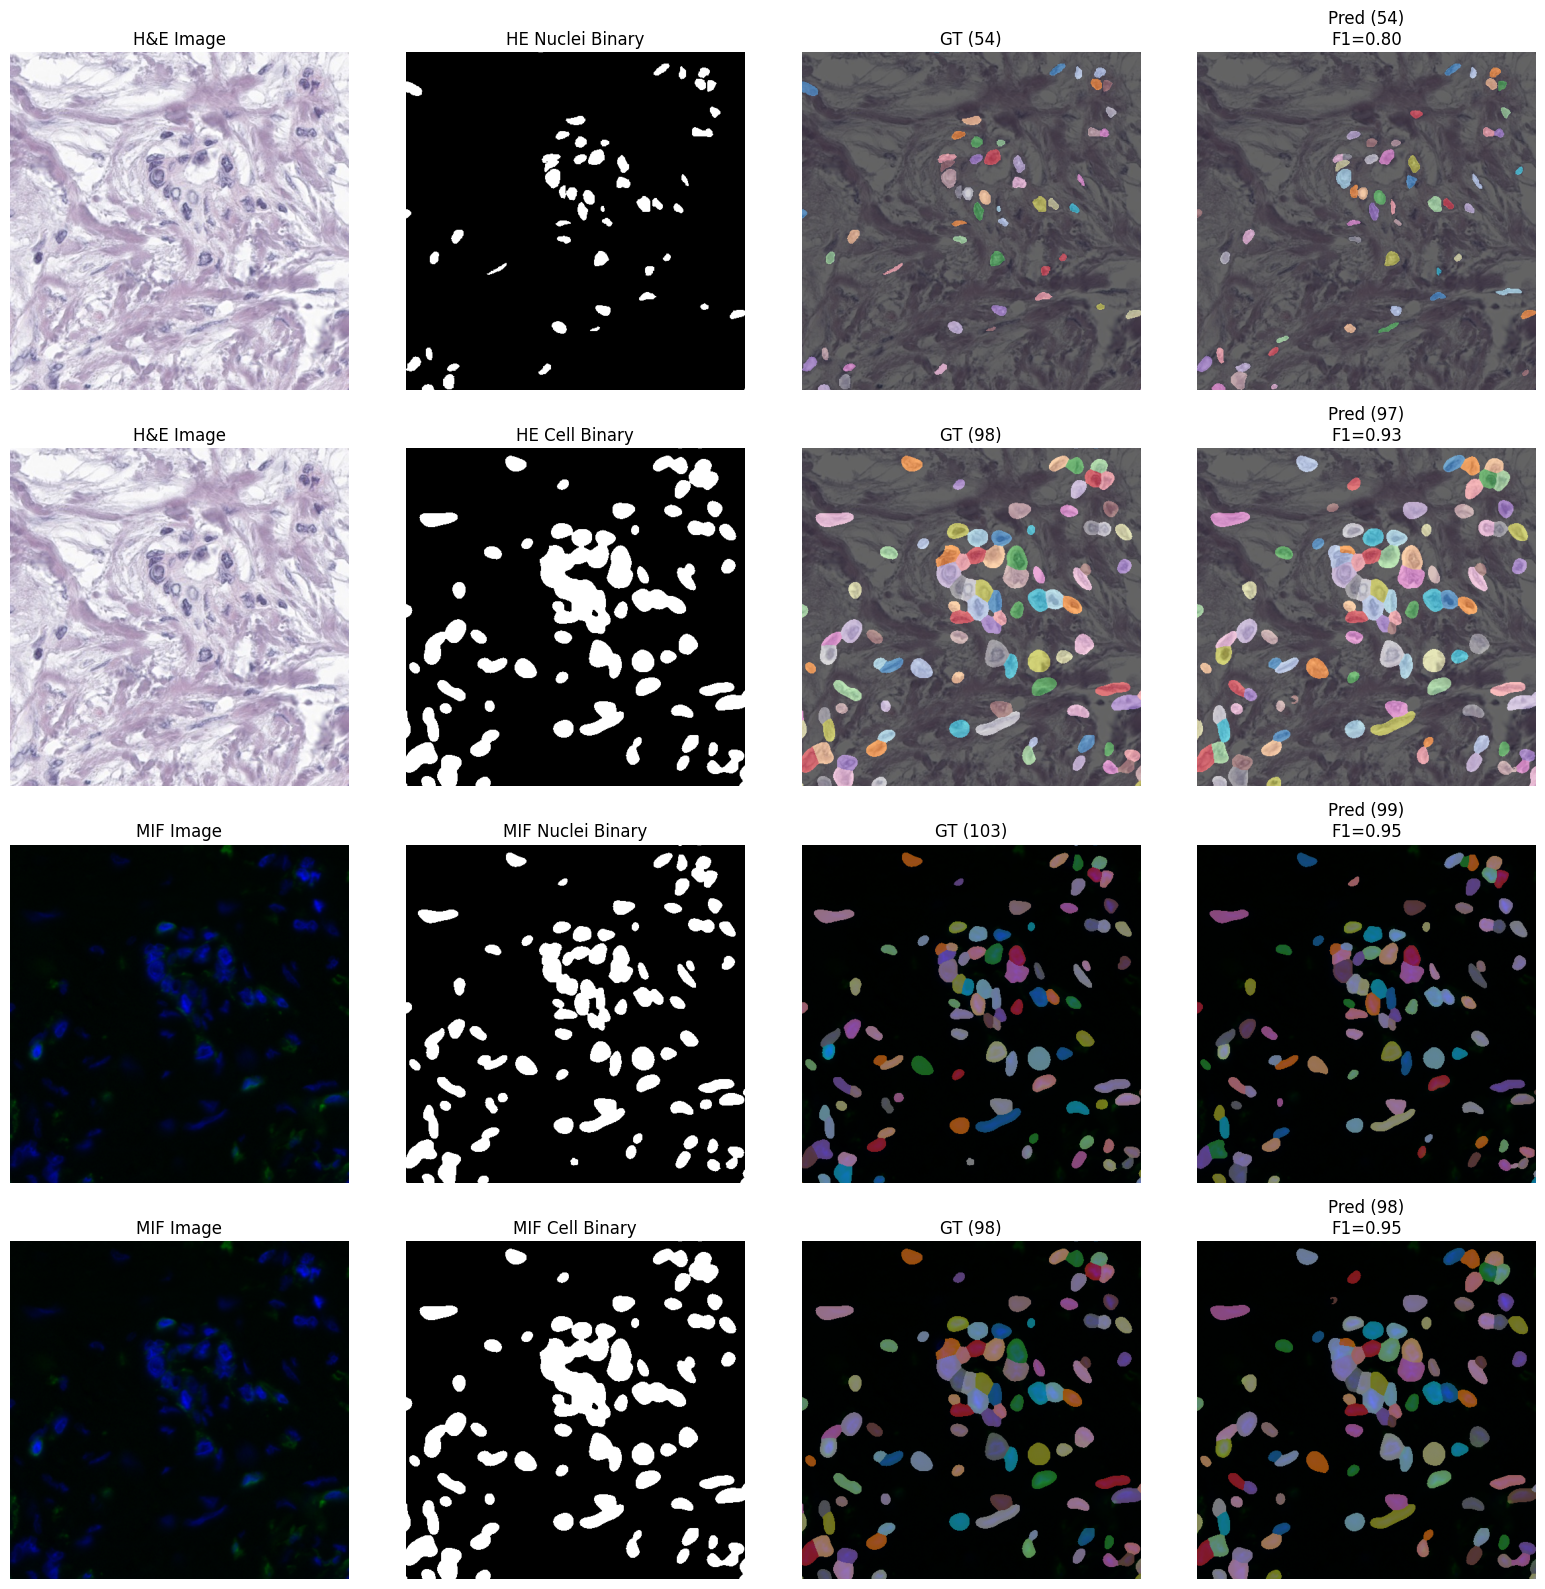

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import random
from scipy.ndimage import label
from postprocessing import process_model_outputs

sample_idx = random.randint(0, batch['he_image'].shape[0] - 1)

print(f"Selected Sample: {sample_idx}")
# Get predictions
with torch.no_grad():
    outputs = model(batch['he_image'].to(device), batch['mif_image'].to(device))

# ============================================================================
# POST-PROCESS ALL 4 TYPES
# ============================================================================

# HE Nuclei
he_nuclei_inst_pred, _, num_he_nuclei_pred = process_model_outputs(
    outputs['he_nuclei_seg'][sample_idx, 0].cpu().numpy(),
    outputs['he_nuclei_hv'][sample_idx, 0].cpu().numpy(),
    outputs['he_nuclei_hv'][sample_idx, 1].cpu().numpy(),
    magnification=40
)
he_nuclei_gt_inst = batch['he_nuclei_instance'][sample_idx].cpu().numpy()
num_he_nuclei_gt = len(np.unique(he_nuclei_gt_inst)) - 1

# HE Cells
he_cell_inst_pred, _, num_he_cell_pred = process_model_outputs(
    outputs['he_cell_seg'][sample_idx, 0].cpu().numpy(),
    outputs['he_cell_hv'][sample_idx, 0].cpu().numpy(),
    outputs['he_cell_hv'][sample_idx, 1].cpu().numpy(),
    magnification=40
)
he_cell_gt_inst = batch['he_cell_instance'][sample_idx].cpu().numpy()
num_he_cell_gt = len(np.unique(he_cell_gt_inst)) - 1

# MIF Nuclei
mif_nuclei_inst_pred, _, num_mif_nuclei_pred = process_model_outputs(
    outputs['mif_nuclei_seg'][sample_idx, 0].cpu().numpy(),
    outputs['mif_nuclei_hv'][sample_idx, 0].cpu().numpy(),
    outputs['mif_nuclei_hv'][sample_idx, 1].cpu().numpy(),
    magnification=40
)
mif_nuclei_gt_inst = batch['mif_nuclei_instance'][sample_idx].cpu().numpy()
num_mif_nuclei_gt = len(np.unique(mif_nuclei_gt_inst)) - 1

# MIF Cells
mif_cell_inst_pred, _, num_mif_cell_pred = process_model_outputs(
    outputs['mif_cell_seg'][sample_idx, 0].cpu().numpy(),
    outputs['mif_cell_hv'][sample_idx, 0].cpu().numpy(),
    outputs['mif_cell_hv'][sample_idx, 1].cpu().numpy(),
    magnification=40
)
mif_cell_gt_inst = batch['mif_cell_instance'][sample_idx].cpu().numpy()
num_mif_cell_gt = len(np.unique(mif_cell_gt_inst)) - 1

# ============================================================================
# COMPUTE METRICS
# ============================================================================

def compute_metrics(pred_inst, gt_inst, iou_thresh=0.5):
    pred_ids = np.unique(pred_inst)[1:]
    gt_ids = np.unique(gt_inst)[1:]
    
    matched_pred = set()
    matched_gt = set()
    
    for pid in pred_ids:
        pred_mask = (pred_inst == pid)
        for gid in gt_ids:
            if gid in matched_gt:
                continue
            gt_mask = (gt_inst == gid)
            intersection = np.logical_and(pred_mask, gt_mask).sum()
            union = np.logical_or(pred_mask, gt_mask).sum()
            iou = intersection / union if union > 0 else 0
            
            if iou >= iou_thresh:
                matched_pred.add(pid)
                matched_gt.add(gid)
                break
    
    tp = len(matched_pred)
    fp = len(pred_ids) - tp
    fn = len(gt_ids) - len(matched_gt)
    
    prec = tp / (tp + fp) if (tp + fp) > 0 else 0
    rec = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * prec * rec / (prec + rec) if (prec + rec) > 0 else 0
    
    return prec, rec, f1, tp, fp, fn

he_nuclei_prec, he_nuclei_rec, he_nuclei_f1, he_nuclei_tp, he_nuclei_fp, he_nuclei_fn = compute_metrics(he_nuclei_inst_pred, he_nuclei_gt_inst)
he_cell_prec, he_cell_rec, he_cell_f1, he_cell_tp, he_cell_fp, he_cell_fn = compute_metrics(he_cell_inst_pred, he_cell_gt_inst)
mif_nuclei_prec, mif_nuclei_rec, mif_nuclei_f1, mif_nuclei_tp, mif_nuclei_fp, mif_nuclei_fn = compute_metrics(mif_nuclei_inst_pred, mif_nuclei_gt_inst)
mif_cell_prec, mif_cell_rec, mif_cell_f1, mif_cell_tp, mif_cell_fp, mif_cell_fn = compute_metrics(mif_cell_inst_pred, mif_cell_gt_inst)

# ============================================================================
# PRINT RESULTS
# ============================================================================

print("\n" + "="*70)
print(f"DETECTION RESULTS - Sample {sample_idx}")
print("="*70)

print(f"\nHE Nuclei:  GT={num_he_nuclei_gt:3d} | Pred={num_he_nuclei_pred:3d} | "
      f"P={he_nuclei_prec:.3f} R={he_nuclei_rec:.3f} F1={he_nuclei_f1:.3f} | "
      f"TP/FP/FN={he_nuclei_tp}/{he_nuclei_fp}/{he_nuclei_fn}")

print(f"HE Cells:   GT={num_he_cell_gt:3d} | Pred={num_he_cell_pred:3d} | "
      f"P={he_cell_prec:.3f} R={he_cell_rec:.3f} F1={he_cell_f1:.3f} | "
      f"TP/FP/FN={he_cell_tp}/{he_cell_fp}/{he_cell_fn}")

print(f"MIF Nuclei: GT={num_mif_nuclei_gt:3d} | Pred={num_mif_nuclei_pred:3d} | "
      f"P={mif_nuclei_prec:.3f} R={mif_nuclei_rec:.3f} F1={mif_nuclei_f1:.3f} | "
      f"TP/FP/FN={mif_nuclei_tp}/{mif_nuclei_fp}/{mif_nuclei_fn}")

print(f"MIF Cells:  GT={num_mif_cell_gt:3d} | Pred={num_mif_cell_pred:3d} | "
      f"P={mif_cell_prec:.3f} R={mif_cell_rec:.3f} F1={mif_cell_f1:.3f} | "
      f"TP/FP/FN={mif_cell_tp}/{mif_cell_fp}/{mif_cell_fn}")

print("="*70)

# ============================================================================
# PREPARE IMAGES
# ============================================================================

he_image = batch['he_image'][sample_idx].cpu().permute(1, 2, 0).numpy()
mif_image = batch['mif_image'][sample_idx].cpu().permute(1, 2, 0).numpy()

# MIF visualization
mif_vis = np.zeros((mif_image.shape[0], mif_image.shape[1], 3))
mif_vis[:, :, 1] = np.clip(mif_image[:, :, 0] * 5, 0, 1)  # Green (3x brighter)
mif_vis[:, :, 2] = mif_image[:, :, 1]

colors = plt.cm.tab20(np.linspace(0, 1, 20))

# ============================================================================
# COLOR INSTANCES
# ============================================================================

def color_instances(inst_map):
    colored = np.zeros((*inst_map.shape, 3))
    for idx, inst_id in enumerate(np.unique(inst_map)[1:]):
        colored[inst_map == inst_id] = colors[idx % 20][:3]
    return colored

he_nuclei_gt_colored = color_instances(he_nuclei_gt_inst)
he_nuclei_pred_colored = color_instances(he_nuclei_inst_pred)

he_cell_gt_colored = color_instances(he_cell_gt_inst)
he_cell_pred_colored = color_instances(he_cell_inst_pred)

mif_nuclei_gt_colored = color_instances(mif_nuclei_gt_inst)
mif_nuclei_pred_colored = color_instances(mif_nuclei_inst_pred)

mif_cell_gt_colored = color_instances(mif_cell_gt_inst)
mif_cell_pred_colored = color_instances(mif_cell_inst_pred)

# ============================================================================
# PLOT
# ============================================================================

fig, axes = plt.subplots(4, 4, figsize=(16, 16))

# Row 1: HE Nuclei
axes[0, 0].imshow(he_image)
axes[0, 0].set_title('H&E Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(batch['he_nuclei_mask'][sample_idx].cpu().numpy(), cmap='gray')
axes[0, 1].set_title(f'HE Nuclei Binary')
axes[0, 1].axis('off')

axes[0, 2].imshow(he_image)
axes[0, 2].imshow(he_nuclei_gt_colored, alpha=0.6)
axes[0, 2].set_title(f'GT ({num_he_nuclei_gt})')
axes[0, 2].axis('off')

axes[0, 3].imshow(he_image)
axes[0, 3].imshow(he_nuclei_pred_colored, alpha=0.6)
axes[0, 3].set_title(f'Pred ({num_he_nuclei_pred})\nF1={he_nuclei_f1:.2f}')
axes[0, 3].axis('off')

# Row 2: HE Cells
axes[1, 0].imshow(he_image)
axes[1, 0].set_title('H&E Image')
axes[1, 0].axis('off')

axes[1, 1].imshow(batch['he_cell_mask'][sample_idx].cpu().numpy(), cmap='gray')
axes[1, 1].set_title(f'HE Cell Binary')
axes[1, 1].axis('off')

axes[1, 2].imshow(he_image)
axes[1, 2].imshow(he_cell_gt_colored, alpha=0.6)
axes[1, 2].set_title(f'GT ({num_he_cell_gt})')
axes[1, 2].axis('off')

axes[1, 3].imshow(he_image)
axes[1, 3].imshow(he_cell_pred_colored, alpha=0.6)
axes[1, 3].set_title(f'Pred ({num_he_cell_pred})\nF1={he_cell_f1:.2f}')
axes[1, 3].axis('off')

# Row 3: MIF Nuclei
axes[2, 0].imshow(mif_vis)
axes[2, 0].set_title('MIF Image')
axes[2, 0].axis('off')

axes[2, 1].imshow(batch['mif_nuclei_mask'][sample_idx].cpu().numpy(), cmap='gray')
axes[2, 1].set_title(f'MIF Nuclei Binary')
axes[2, 1].axis('off')

axes[2, 2].imshow(mif_vis)
axes[2, 2].imshow(mif_nuclei_gt_colored, alpha=0.6)
axes[2, 2].set_title(f'GT ({num_mif_nuclei_gt})')
axes[2, 2].axis('off')

axes[2, 3].imshow(mif_vis)
axes[2, 3].imshow(mif_nuclei_pred_colored, alpha=0.6)
axes[2, 3].set_title(f'Pred ({num_mif_nuclei_pred})\nF1={mif_nuclei_f1:.2f}')
axes[2, 3].axis('off')

# Row 4: MIF Cells
axes[3, 0].imshow(mif_vis)
axes[3, 0].set_title('MIF Image')
axes[3, 0].axis('off')

axes[3, 1].imshow(batch['mif_cell_mask'][sample_idx].cpu().numpy(), cmap='gray')
axes[3, 1].set_title(f'MIF Cell Binary')
axes[3, 1].axis('off')

axes[3, 2].imshow(mif_vis)
axes[3, 2].imshow(mif_cell_gt_colored, alpha=0.6)
axes[3, 2].set_title(f'GT ({num_mif_cell_gt})')
axes[3, 2].axis('off')

axes[3, 3].imshow(mif_vis)
axes[3, 3].imshow(mif_cell_pred_colored, alpha=0.6)
axes[3, 3].set_title(f'Pred ({num_mif_cell_pred})\nF1={mif_cell_f1:.2f}')
axes[3, 3].axis('off')

plt.tight_layout()
plt.show()